![housesbanner](housesbanner.png "housesbanner")



# **Description :**

####  *Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.*

#### *With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.*

#### Data fields
Here's a brief version of what you'll find in the data description file.

> - SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [65]:
# import packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Basic packages imported!!!")

from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import math
from scipy.stats import skew
import collections
print("Model related packages imported!!!")

import warnings

%config IPCompleter.greedy = True # autocomplete feature.
%matplotlib inline

pd.options.display.precision = 2 # set the precision of floating point numbers.
warnings.filterwarnings('ignore') # ignore warnings.

print("Basic notebook settings done!!!")

Basic packages imported!!!
Model related packages imported!!!
Basic notebook settings done!!!


In [66]:
# read dataset (train, test)
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [67]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [68]:
dic = {df_train.columns[i] : df_train.isnull().sum()[i] for i in range(len(df_train.isnull().sum()))}
for key, val in dic.items():
    if(val > 0):
        print("{} \t: {}".format(key, val))

LotFrontage 	: 259
Alley 	: 1369
MasVnrType 	: 8
MasVnrArea 	: 8
BsmtQual 	: 37
BsmtCond 	: 37
BsmtExposure 	: 38
BsmtFinType1 	: 37
BsmtFinType2 	: 38
Electrical 	: 1
FireplaceQu 	: 690
GarageType 	: 81
GarageYrBlt 	: 81
GarageFinish 	: 81
GarageQual 	: 81
GarageCond 	: 81
PoolQC 	: 1453
Fence 	: 1179
MiscFeature 	: 1406


In [69]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Analysing SalePrice

SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

Skewness: 1.882876
Kurtosis: 6.536282


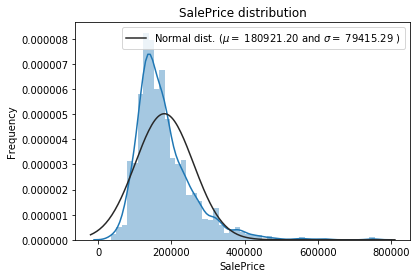

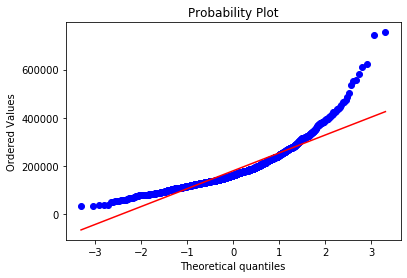

In [70]:
# First things first: analysing 'SalePrice'
(mu, sigma) = norm.fit(df_train['SalePrice'])
sns.distplot(df_train.SalePrice, fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed

kurtosis(X)=E[(X−μσ)4]
 
https://en.wikipedia.org/wiki/Kurtosis

Skewness: 0.121347
Kurtosis: 0.809519


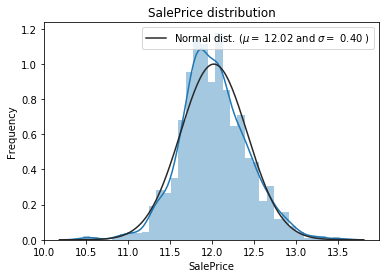

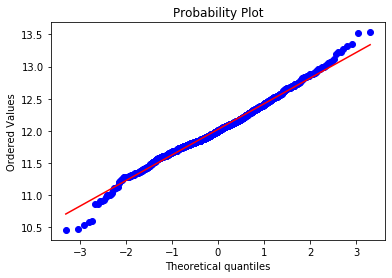

In [71]:
# First things first: analysing 'SalePrice'
sales_normal = np.log1p(df_train.SalePrice)

(mu, sigma) = norm.fit(sales_normal)
sns.distplot(sales_normal, fit=norm)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#skewness and kurtosis
print("Skewness: %f" % sales_normal.skew())
print("Kurtosis: %f" % sales_normal.kurt())

fig = plt.figure()
res = stats.probplot(sales_normal, plot=plt)
plt.show()

The skew seems now corrected and the data appears more normally distributed.

#### Find missing values

In [72]:
train_data_na = (df_train.isnull().sum()/len(df_train)) * 100
train_data_na = train_data_na.sort_values(ascending=False)[:20]

train_data_na_count = df_train.isnull().sum().sort_values(ascending=False)[:20]

missing_data = pd.DataFrame({'Missing Count' : train_data_na_count, 'Missing Ratio' : train_data_na})
missing_data.head(20)

,Missing Count,Missing Ratio
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


Text(0.5, 1.0, 'Percent missing data by feature')

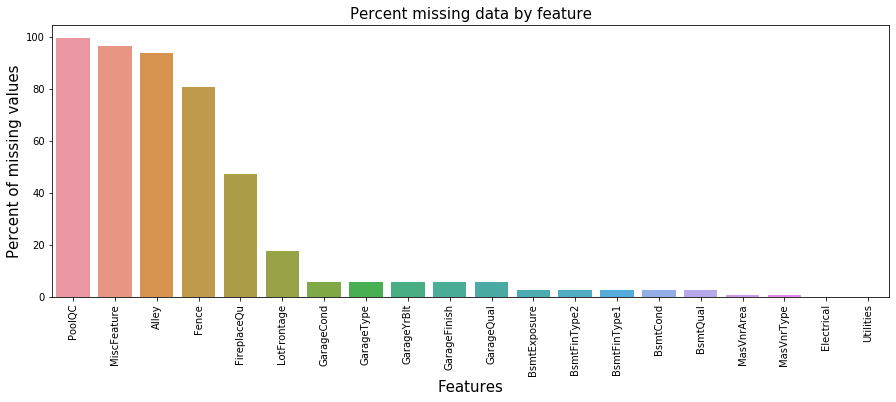

In [73]:
f, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
sns.barplot(x=train_data_na.index, y=train_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

#### Imputing missing values

We impute them by proceeding sequentially through features with missing values

In [74]:
# PoolQC : data description says NA means "No Pool". 
# That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
df_train.PoolQC = df_train.PoolQC.fillna("None")
df_test.PoolQC = df_test.PoolQC.fillna("None")

In [75]:
# MiscFeature : data description says NA means "no misc feature"
df_train.MiscFeature = df_train.MiscFeature.fillna("None")
df_test.MiscFeature = df_test.MiscFeature.fillna("None")

In [76]:
# Alley : data description says NA means "no alley access"
df_train.Alley = df_train.Alley.fillna("None")
df_test.Alley = df_test.Alley.fillna("None")

In [77]:
# Fence : data description says NA means "no fence"
df_train.Fence = df_train.Fence.fillna("None")
df_test.Fence = df_test.Fence.fillna("None")

In [78]:
# FireplaceQu : data description says NA means "no fireplace"
df_train.FireplaceQu = df_train.FireplaceQu.fillna("None")
df_test.FireplaceQu = df_test.FireplaceQu.fillna("None")

In [79]:
# LotFrontage : Since the area of each street connected to the house property most likely have a similar area 
# to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train.LotFrontage = df_train.groupby("Neighborhood").LotFrontage.transform(lambda x: x.fillna(x.median()))
df_test.LotFrontage = df_test.groupby("Neighborhood").LotFrontage.transform(lambda x: x.fillna(x.median()))

In [80]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')
    df_test[col] = df_test[col].fillna('None')

In [81]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)

In [82]:
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)

In [83]:
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : 
# For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')
    df_test[col] = df_test[col].fillna('None')

In [84]:
# MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. 
# We can fill 0 for the area and None for the type.
df_train.MasVnrType = df_train.MasVnrType.fillna("None")
df_train.MasVnrArea = df_train.MasVnrArea.fillna(0)

df_test.MasVnrType = df_test.MasVnrType.fillna("None")
df_test.MasVnrArea = df_test.MasVnrArea.fillna(0)

In [85]:
# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
df_train.MSZoning = df_train.MSZoning.fillna(df_train.MSZoning.mode()[0])
df_test.MSZoning = df_test.MSZoning.fillna(df_test.MSZoning.mode()[0])

In [86]:
# Utilities : For this categorical feature all records are "AllPub", 
# except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, 
# this feature won't help in predictive modelling. We can then safely remove it.
df_train = df_train.drop(['Utilities'], axis=1)
df_test = df_test.drop(['Utilities'], axis=1)

In [87]:
# Functional : data description says NA means typical
df_train.Functional = df_train.Functional.fillna("Typ")
df_test.Functional = df_test.Functional.fillna("Typ")

In [88]:
# Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
df_train.Electrical = df_train.Electrical.fillna(df_train.Electrical.mode()[0])
df_test.Electrical = df_test.Electrical.fillna(df_test.Electrical.mode()[0])

In [89]:
# KitchenQual: Only one NA value, and same as Electrical, 
# we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
df_train.KitchenQual = df_train.KitchenQual.fillna(df_train.KitchenQual.mode()[0])
df_test.KitchenQual = df_test.KitchenQual.fillna(df_test.KitchenQual.mode()[0])

In [90]:
# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. 
# We will just substitute in the most common string
df_train.Exterior1st = df_train.Exterior1st.fillna(df_train.Exterior1st.mode()[0])
df_train.Exterior2nd = df_train.Exterior2nd.fillna(df_train.Exterior2nd.mode()[0])

df_test.Exterior1st = df_test.Exterior1st.fillna(df_test.Exterior1st.mode()[0])
df_test.Exterior2nd = df_test.Exterior2nd.fillna(df_test.Exterior2nd.mode()[0])

In [91]:
# SaleType : Fill in again with most frequent which is "WD"
df_train.SaleType = df_train.SaleType.fillna(df_train.SaleType.mode()[0])
df_test.SaleType = df_test.SaleType.fillna(df_test.SaleType.mode()[0])

In [92]:
# MSSubClass : Na most likely means No building class. We can replace missing values with None
df_train.MSSubClass = df_train.MSSubClass.fillna("None")
df_test.MSSubClass = df_test.MSSubClass.fillna("None")

In [93]:
# Is there any remaining missing value ?
# Check remaining missing values if any 
train_data_na = (df_train.isnull().sum()/len(df_train)) * 100
train_data_na = train_data_na.sort_values(ascending=False)[:20]

train_data_na_count = df_train.isnull().sum().sort_values(ascending=False)[:20]

missing_data = pd.DataFrame({'Missing Count' : train_data_na_count, 'Missing Ratio' : train_data_na})
missing_data.head()

,Missing Count,Missing Ratio
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


It remains no missing value.

In [32]:
print('MSSubClass : {} -> {}'.format(df_train['MSSubClass'].nunique(), df_train['MSSubClass'].unique()))
print('OverallCond : {} -> {}'.format(df_train['OverallCond'].nunique(), df_train['OverallCond'].unique()))
print('YrSold : {} -> {}'.format(df_train['YrSold'].nunique(), df_train['YrSold'].unique()))
print('MoSold : {} -> {}'.format(df_train['MoSold'].nunique(), df_train['MoSold'].unique()))
print('len : ', len(df_train))

MSSubClass : 15 -> [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallCond : 9 -> [5 8 6 7 4 2 3 9 1]
YrSold : 5 -> [2008 2007 2006 2009 2010]
MoSold : 12 -> [ 2  5  9 12 10  8 11  4  1  7  3  6]
len :  1460


#### More features engeneering

Transforming some numerical variables that are really categorical

In [175]:
df_train.MSSubClass = df_train.MSSubClass.apply(str)

#Changing OverallCond into a categorical variable
df_train.OverallCond = df_train.OverallCond.astype(str)

#Year and month sold are transformed into categorical features.
df_train.YrSold = df_train.YrSold.astype(str)
df_train.MoSold = df_train.MoSold.astype(str)


df_test.MSSubClass = df_test.MSSubClass.apply(str)

#Changing OverallCond into a categorical variable
df_test.OverallCond = df_test.OverallCond.astype(str)

#Year and month sold are transformed into categorical features.
df_test.YrSold = df_test.YrSold.astype(str)
df_test.MoSold = df_test.MoSold.astype(str)

In [96]:
'''l = list(df_train.columns)
for col in l:
    if df_train[col].nunique() < 100 and df_train[col].dtypes != "object":
        print (col, end='; ')
        df_train[col] = df_train[col].astype(str)
'''

'l = list(df_train.columns)\nfor col in l:\n    if df_train[col].nunique() < 100 and df_train[col].dtypes != "object":\n        print (col, end=\'; \')\n        df_train[col] = df_train[col].astype(str)\n'

#### check the numbers of samples and features

In [97]:
print("The train data size before dropping Id feature is : {} ".format(df_train.shape))
print("The test data size before dropping Id feature is : {} ".format(df_test.shape))

#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))

The train data size before dropping Id feature is : (1460, 80) 
The test data size before dropping Id feature is : (1459, 79) 

The train data size after dropping Id feature is : (1460, 79) 
The test data size after dropping Id feature is : (1459, 78) 


#### Data Correlation

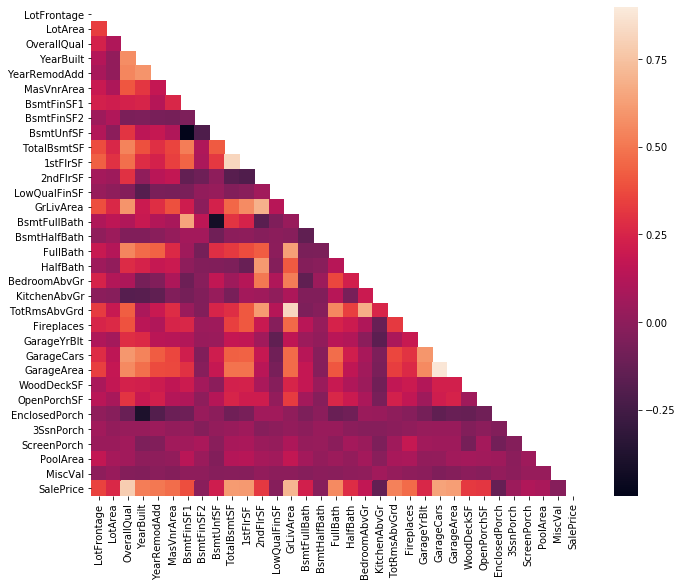

In [98]:
# Correlation map to see how features are correlated with SalePrice
corrmat = df_train.corr()

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, mask=mask)

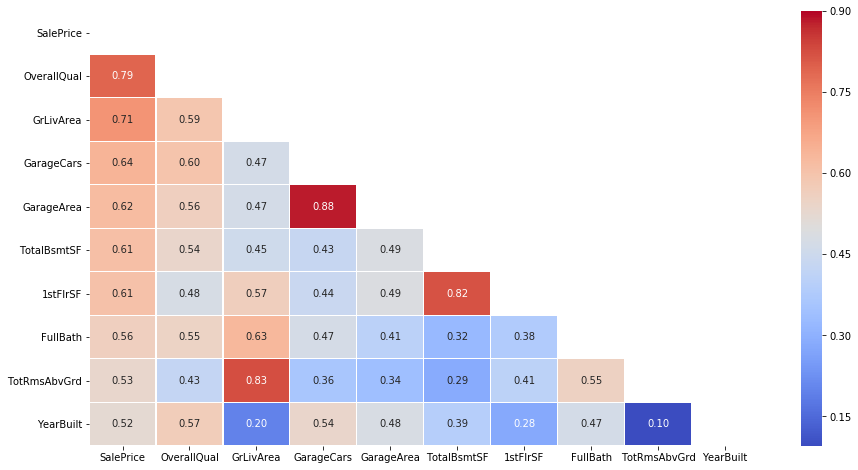

In [99]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap

cols = corrmat.nlargest(k, 'SalePrice').SalePrice.index
cm = np.corrcoef(df_train[cols].T)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,8))
hm = sns.heatmap(cm, annot=True, cmap = 'coolwarm', vmax=.9, linecolor='white', linewidths=.1, mask=mask,
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [100]:
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


In [101]:
lis = list(cols)
lis.remove('TotRmsAbvGrd')
lis.remove('SalePrice')
lis.remove('GarageArea')
print("Len = {} \n{}".format(len(lis), lis))

Len = 7 
['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt']


"\nfor col in cols:\n    if col != 'SalePrice':\n        df_train.plot.scatter(x=col, y='SalePrice')\n"

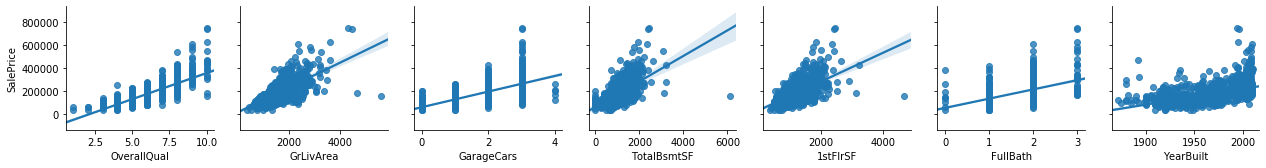

In [102]:
sns.pairplot(df_train, x_vars=lis, y_vars='SalePrice', aspect=1, kind='reg')

'''
for col in cols:
    if col != 'SalePrice':
        df_train.plot.scatter(x=col, y='SalePrice')
'''        

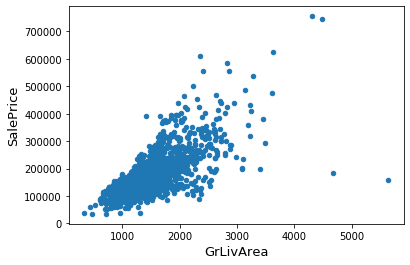

In [103]:
df_train.plot.scatter(x='GrLivArea', y='SalePrice')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

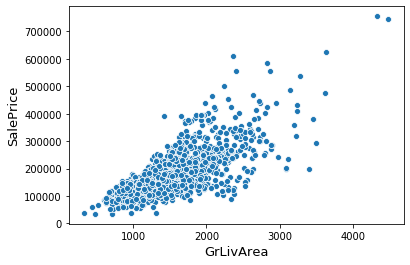

In [104]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

sns.scatterplot(y =df_train.SalePrice,x = df_train.GrLivArea)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

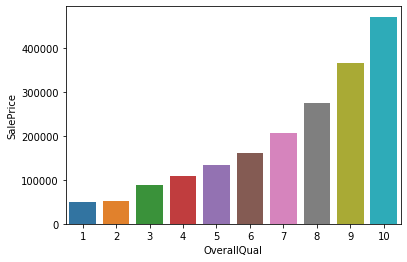

In [105]:
sns.barplot(df_train.OverallQual,df_train.SalePrice, ci=None)

In [106]:
# let's first concatenate the train and test data in the same dataframe
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train_val = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 78)


In [108]:
# Label Encoding some categorical variables that may contain information in their ordering set
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


#### Adding one more important feature
Since area related features are very important to determine house prices, 
we add one more feature which is the total area of basement, first and second floor areas of each house

In [176]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

#### Skewed features
Check the skew of all numerical features

In [179]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skewness in numerical features:")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

Skewness in numerical features:


,Skew
Condition2_RRAn,53.98
RoofMatl_Membran,53.98
Condition2_RRAe,53.98
Exterior2nd_Other,53.98
Electrical_Mix,53.98
Exterior1st_ImStucc,53.98
Heating_Floor,53.98
RoofMatl_Metal,53.98
MiscFeature_TenC,53.98
RoofMatl_Roll,53.98


In [111]:
skewed_feats = skewed_feats[skewed_feats > 0.75]
print("There are {} skewed numerical features for log transform".format(skewness.shape[0]))
skewed_feats = skewed_feats.index
skewed_feats

There are 59 skewed numerical features for log transform


Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', '1stFlrSF', 'LotFrontage', 'GrLivArea', 'TotalSF',
       'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF'],
      dtype='object')

#### Log transformation

In [ ]:
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

#### Getting dummy categorical features

In [113]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


#### Save the process dataset for future use.

In [119]:
from sklearn.externals import joblib
joblib.dump(all_data, 'Processed_Dataset.sav')

['Processed_Dataset.sav']

### Modelling

In [120]:
from sklearn.externals import joblib
all_data = joblib.load('Processed_Dataset.sav')

In [121]:
# Getting the new train and test sets.
train_preprocessed = all_data[:ntrain]
test_preprocessed = all_data[ntrain:]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(train_preprocessed, y_train_val, test_size=0.3, random_state=0)

In [123]:
# Baseline model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg = LinearRegression().fit(X_train, y_train)
linreg_pred_train = linreg.predict(X_train)
linereg_pred_test = linreg.predict(X_test)

rmse_test = np.sqrt(np.mean((y_test - linereg_pred_test)**2))
rmse_train = np.sqrt(np.mean((y_train - linreg_pred_train)**2))
print("test rmse : ", rmse_test)
print("train rmse : ", rmse_train)

# print('Accuracy', np.sqrt(metrics.mean_squared_error(y_test, linereg_pred_test)))
# print('Accuracy', np.sqrt(metrics.mean_squared_error(y_train, linreg_pred_train)))

test rmse :  29889.37769798285
train rmse :  21805.833236884937


In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

hyper_param = {'normalize':[True,False], 'copy_X':[True, False], 'fit_intercept':[True,False]}

lin_reg_cv = LinearRegression()
lin_reg_cv = GridSearchCV(lin_reg_cv, hyper_param, cv=10)
lin_reg_cv.fit(X_train, y_train)

linreg_pred_train = linreg.predict(X_train)
linereg_pred_test = linreg.predict(X_test)

rmse_test = np.sqrt(np.mean((y_test - linereg_pred_test)**2))
rmse_train = np.sqrt(np.mean((y_train - linreg_pred_train)**2))
print("*"*50)
print("Test RMSE  : ", rmse_test)
print("Train RMSE : ", rmse_train)
print("*"*50)
# print(lin_reg_cv.best_estimator_)
# print(lin_reg_cv.best_score_)
# print('Accuracy', np.sqrt(metrics.mean_squared_error(y_test, linereg_pred_test)))

**************************************************
Test RMSE  :  29889.37769798285
Train RMSE :  21805.833236884937
**************************************************


In [134]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)

pred_train = rfr.predict(X_train)
pred_test = rfr.predict(X_test)

rmse_test = np.sqrt(np.mean((y_test - pred_test)**2))
rmse_train = np.sqrt(np.mean((y_train - pred_train)**2))
print("*"*50)
print("Test RMSE  : ", rmse_test)
print("Train RMSE : ", rmse_train)
print("*"*50)
# print('Accuracy', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

**************************************************
Test RMSE  :  26231.970531689207
Train RMSE :  11362.082813476758
**************************************************


In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

hyper_param={#"max_depth": range(2,300),
              #"min_samples_split": sp_randint(2, 25),
              #"min_samples_leaf": sp_randint(5, 20),
              "bootstrap": [True, False],
              "n_estimators": range(300, 600, 20), #[20,50,100,400],
              'max_features': ['auto','sqrt', 'log2', None]
            }

rfr = RandomForestRegressor(random_state=0)
rfr_cv = RandomizedSearchCV(rfr, hyper_param,  n_iter = 100, cv=4)

rfr_cv.fit(X_train,y_train)

pred_train = rfr_cv.predict(X_train)
pred_test = rfr_cv.predict(X_test)

rmse_test = np.sqrt(np.mean((y_test - pred_test)**2))
rmse_train = np.sqrt(np.mean((y_train - pred_train)**2))
print("*"*50)
print("Test RMSE  : ", rmse_test)
print("Train RMSE : ", rmse_train)
print("*"*50)

**************************************************
Test RMSE  :  26098.24961317833
Train RMSE :  3.512035829338122
**************************************************


In [138]:
print(rfr_cv.best_estimator_)
print("*"*50)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=520,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
**************************************************
RMSE 26098.24961317833


In [166]:
rfr_cv = rfr_cv.best_estimator_
rfr_cv.fit(X_train,y_train)

pred_train = rfr_cv.predict(X_train)
pred_test = rfr_cv.predict(X_test)

rmse_test = np.sqrt(np.mean((y_test - pred_test)**2))
rmse_train = np.sqrt(np.mean((y_train - pred_train)**2))
print("*"*50)
print("Test RMSE  : ", rmse_test)
print("Train RMSE : ", rmse_train)
print("*"*50)

AttributeError: 'RandomForestRegressor' object has no attribute 'best_estimator_'

In [168]:
from sklearn.externals import joblib
model_name = "RandomForestReg_CV.sav"
rfr_cv = joblib.load(model_name)

y_test_pred = final_model.predict(test_preprocessed)
submission = pd.DataFrame({"Id": test_ID,"SalePrice": y_test_pred})
submission.loc[submission['SalePrice'] <= 0, 'SalePrice'] = 0
fileName = "final_submission_cv.csv".format(rmse)
submission.to_csv(fileName, index=False)

In [140]:
from sklearn.externals import joblib
model_name = "RandomForestReg_CV.sav"
joblib.dump(rfr_cv, model_name)

['RandomForestReg_CV.sav']

In [164]:
from sklearn.externals import joblib
# load the model from disk
random_forest_reg_model = joblib.load("RandomForestReg_CV.sav")

pred_train = random_forest_reg_model.predict(X_train)
pred_test = random_forest_reg_model.predict(X_test)

rmse_test = np.sqrt(np.mean((y_test - pred_test)**2))
rmse_train = np.sqrt(np.mean((y_train - pred_train)**2))
print("*"*50)
print("Test RMSE  : ", rmse_test)
print("Train RMSE : ", rmse_train)
print("*"*50)

**************************************************
Test RMSE  :  8865.335070491632
Train RMSE :  9417.844410421767
**************************************************


In [148]:
print("*"*50)
rmse_est = {}
for est in range(360,550,20):
    model = RandomForestRegressor(n_estimators=est, n_jobs=-1)
    model.fit(X_train, y_train)
    predictions = np.array(model.predict(X_test))
    rmse = math.sqrt(np.mean((np.array(y_test) - predictions)**2))
    imp = sorted(zip(df_train.columns, model.feature_importances_), key=lambda tup: tup[1], reverse=True)
    print ("RMSE: {0} - est: {1}".format(str(rmse), est))
    rmse_est[rmse]= est
print("*"*50)    

**************************************************
RMSE: 24645.70469015084 - est: 360
RMSE: 24715.662894560097 - est: 380
RMSE: 24780.92046937788 - est: 400
RMSE: 24312.208825044487 - est: 420
RMSE: 24728.554193919663 - est: 440
RMSE: 24539.130962685846 - est: 460
RMSE: 24598.65073256701 - est: 480
RMSE: 24517.741788268646 - est: 500
RMSE: 24566.354102546087 - est: 520
RMSE: 24475.704759520562 - est: 540
**************************************************


In [159]:
d = collections.OrderedDict(sorted(rmse_est.items()))

final_model = RandomForestRegressor(n_estimators=list(d.items())[0][1], n_jobs=-1)
final_model.fit(train_preprocessed, y_train_val)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=420, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [161]:
from sklearn.externals import joblib
final_model_name = "RandomForestReg_CV.sav"
joblib.dump(final_model, final_model_name)

['RandomForestReg_CV.sav']

In [162]:
pred_train = final_model.predict(X_train)
pred_test = final_model.predict(X_test)

rmse_test = np.sqrt(np.mean((y_test - pred_test)**2))
rmse_train = np.sqrt(np.mean((y_train - pred_train)**2))
print("*"*50)
print("Test RMSE  : ", rmse_test)
print("Train RMSE : ", rmse_train)
print("*"*50)

**************************************************
Test RMSE  :  8865.335070491632
Train RMSE :  9417.844410421767
**************************************************


In [163]:
y_test_pred = final_model.predict(test_preprocessed)
submission = pd.DataFrame({"Id": test_ID,"SalePrice": y_test_pred})
submission.loc[submission['SalePrice'] <= 0, 'SalePrice'] = 0
fileName = "final_submission.csv".format(rmse)
submission.to_csv(fileName, index=False)

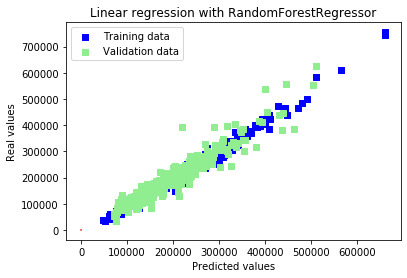

In [137]:
model = RandomForestRegressor(n_estimators=list(d.items())[0][1], n_jobs=-1)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
#submission = pd.DataFrame({"Id": test_ID,"SalePrice": y_test_pred})
#submission.loc[submission['SalePrice'] <= 0, 'SalePrice'] = 0


# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with RandomForestRegressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [170]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train,y_train)
y_pred_test = dt.predict(X_test)

print('Accuracy', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
#rmse.append(np.sqrt(metrics.mean_squared_error(ytest, y_pred_test)))
#rmse[-1]

Accuracy 37136.68335970384


In [172]:
from sklearn.tree import DecisionTreeRegressor
dt_cv = DecisionTreeRegressor(random_state = 0)
hyper_param={#"max_depth": range(2,50),
            'splitter':['best','random'],             
             'max_features':['auto','sqrt','log2'],
             'presort':[True,False]
            }
dt_cv = GridSearchCV(dt_cv, hyper_param, cv=4, verbose=1)
dt_cv.fit(X_train,y_train)
y_pred_test = dt_cv.predict(X_test)

print('Accuracy', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy 44664.311424862215


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.5s finished


In [183]:
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python